# Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

# Data Loading and Summary Statistics

In [2]:
train_timeseries = pd.read_csv('/Users/fantunez/Documents/dataMining/archive/train_timeseries/train_timeseries.csv')
# valid_timeseries = pd.read_csv('D:\\FinalDataMining\\Drought-Modeling\\validation_timeseries.csv')
# test_timeseries = pd.read_csv('D:\\FinalDataMining\\Drought-Modeling\\test_timeseries.csv')

# train_timeseries = train_timeseries[train_timeseries['score'].notnull()].reset_index(drop=True)
# valid_timeseries = valid_timeseries[valid_timeseries['score'].notnull()].reset_index(drop=True)
# test_timeseries = test_timeseries[test_timeseries['score'].notnull()].reset_index(drop=True)

# train_timeseries = train_timeseries.sample(n=1000000, random_state=42)
# valid_timeseries = valid_timeseries.sample(n=1000000, random_state=42)
# test_timeseries = test_timeseries.sample(n=1000000, random_state=42)
train_timeseries = train_timeseries[train_timeseries['score'].notnull()].reset_index(drop=True)

train_timeseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756796 entries, 0 to 2756795
Data columns (total 21 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fips         int64  
 1   date         object 
 2   PRECTOT      float64
 3   PS           float64
 4   QV2M         float64
 5   T2M          float64
 6   T2MDEW       float64
 7   T2MWET       float64
 8   T2M_MAX      float64
 9   T2M_MIN      float64
 10  T2M_RANGE    float64
 11  TS           float64
 12  WS10M        float64
 13  WS10M_MAX    float64
 14  WS10M_MIN    float64
 15  WS10M_RANGE  float64
 16  WS50M        float64
 17  WS50M_MAX    float64
 18  WS50M_MIN    float64
 19  WS50M_RANGE  float64
 20  score        float64
dtypes: float64(19), int64(1), object(1)
memory usage: 441.7+ MB


In [3]:
train_timeseries.describe()

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
count,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06,2.756796e+06
mean,3.067038e+04,2.714566e+00,9.664736e+01,7.875770e+00,1.289923e+01,7.049350e+00,7.084938e+00,1.876711e+01,7.519916e+00,1.124720e+01,1.297493e+01,3.564075e+00,5.202917e+00,1.920655e+00,3.282268e+00,5.532799e+00,7.828799e+00,3.121578e+00,4.707223e+00,8.245298e-01
std,1.497911e+04,6.247590e+00,5.444698e+00,4.721459e+00,1.097040e+01,1.019765e+01,1.014364e+01,1.160295e+01,1.061818e+01,4.038022e+00,1.119095e+01,1.847645e+00,2.609219e+00,1.342458e+00,1.943136e+00,2.298550e+00,2.836618e+00,2.109945e+00,2.181020e+00,1.223727e+00
min,1.001000e+03,0.000000e+00,6.649000e+01,1.400000e-01,-3.544000e+01,-3.544000e+01,-3.546000e+01,-3.003000e+01,-4.085000e+01,1.600000e-01,-3.716000e+01,2.900000e-01,5.700000e-01,0.000000e+00,2.600000e-01,5.100000e-01,8.500000e-01,0.000000e+00,4.200000e-01,0.000000e+00
25%,1.904450e+04,0.000000e+00,9.583000e+01,3.810000e+00,4.580000e+00,-8.800000e-01,-8.400000e-01,1.036000e+01,-5.700000e-01,8.370000e+00,4.460000e+00,2.140000e+00,3.130000e+00,9.600000e-01,1.820000e+00,3.820000e+00,5.700000e+00,1.450000e+00,3.140000e+00,0.000000e+00
50%,2.921200e+04,1.900000e-01,9.828000e+01,6.940000e+00,1.421000e+01,7.810000e+00,7.810000e+00,2.062000e+01,8.260000e+00,1.120000e+01,1.423000e+01,3.160000e+00,4.700000e+00,1.660000e+00,2.820000e+00,5.150000e+00,7.350000e+00,2.770000e+00,4.270000e+00,0.000000e+00
75%,4.600750e+04,2.260000e+00,9.994000e+01,1.145000e+01,2.200000e+01,1.567000e+01,1.567000e+01,2.797000e+01,1.628000e+01,1.408000e+01,2.218000e+01,4.590000e+00,6.760000e+00,2.570000e+00,4.280000e+00,6.880000e+00,9.490000e+00,4.390000e+00,5.810000e+00,1.189600e+00
max,5.604300e+04,1.686900e+02,1.037600e+02,2.212000e+01,3.933000e+01,2.687000e+01,2.687000e+01,4.775000e+01,3.228000e+01,3.017000e+01,4.248000e+01,1.975000e+01,2.474000e+01,1.462000e+01,1.872000e+01,2.247000e+01,2.833000e+01,1.778000e+01,2.337000e+01,5.000000e+00


# Date Conversion and Score Conversion

In [4]:
train_timeseries['score'] = train_timeseries['score'].round().astype(int)
train_timeseries['year'] = pd.DatetimeIndex(train_timeseries['date']).year
train_timeseries['month'] = pd.DatetimeIndex(train_timeseries['date']).month
train_timeseries['day'] = pd.DatetimeIndex(train_timeseries['date']).day
train_timeseries['score'] = train_timeseries['score'].round().astype(int)

In [5]:
score_5_rows = train_timeseries[train_timeseries['score'] == 5]
num_rows_score_5 = len(score_5_rows)
print("Number of rows where the score is 5:", num_rows_score_5)

Number of rows where the score is 5: 39224


# Data Distrobutions

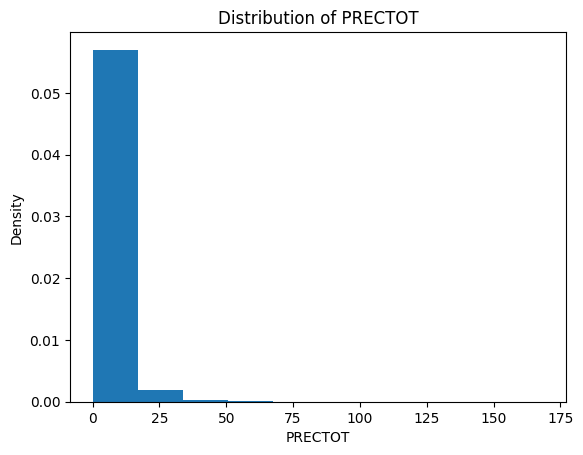

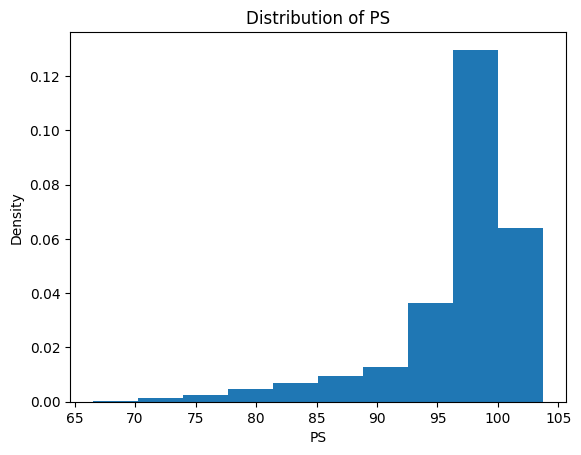

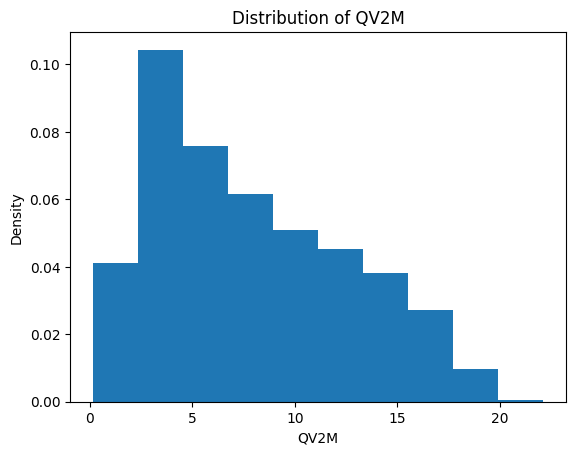

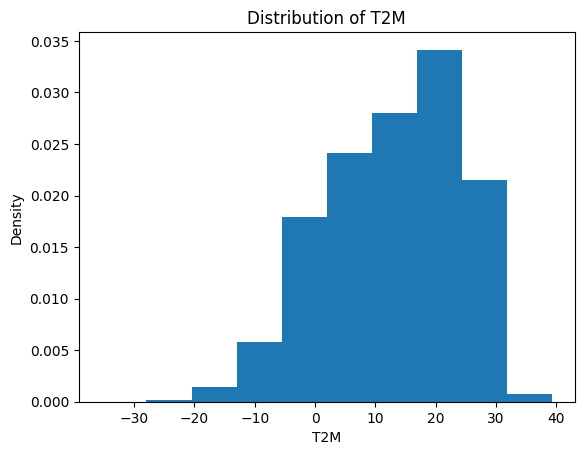

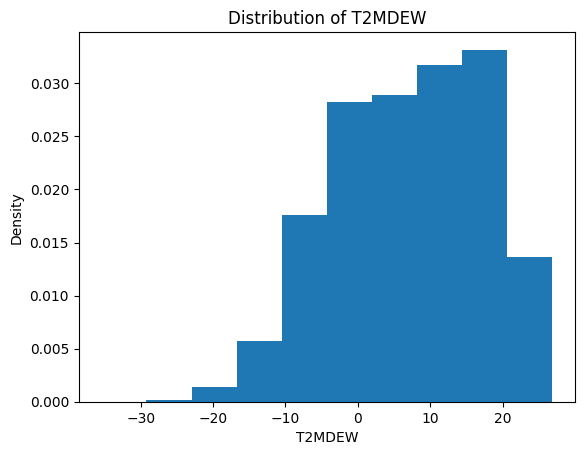

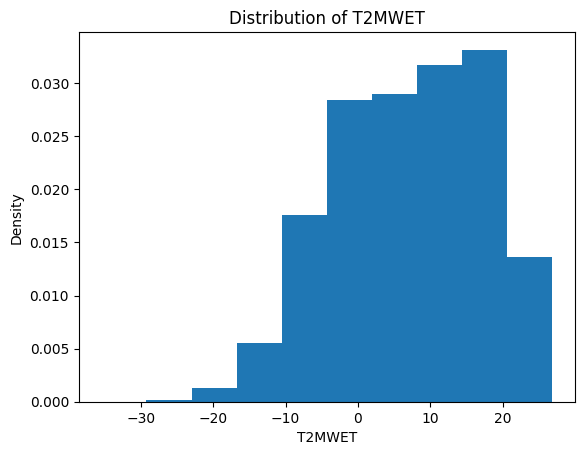

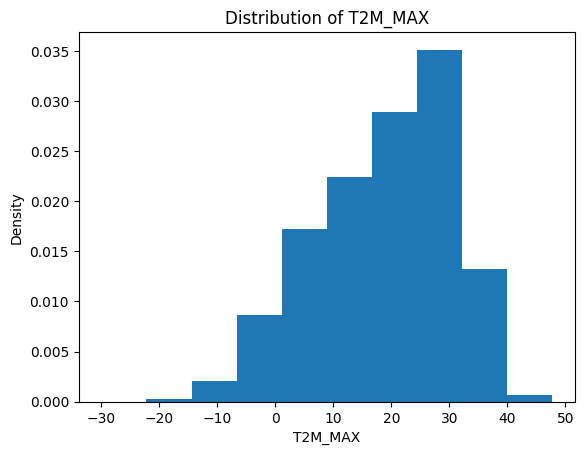

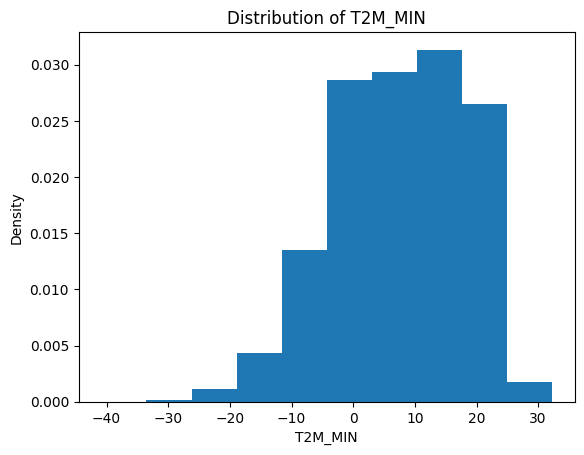

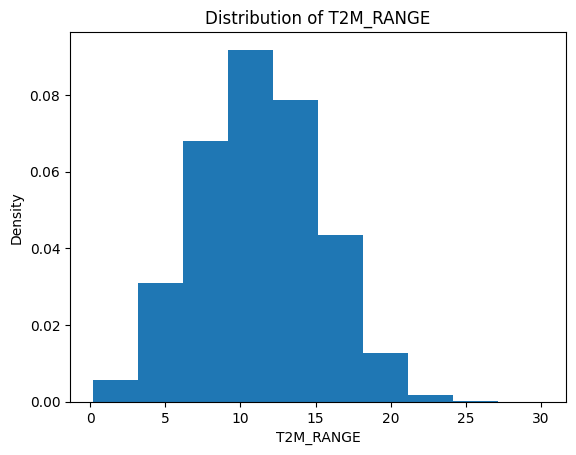

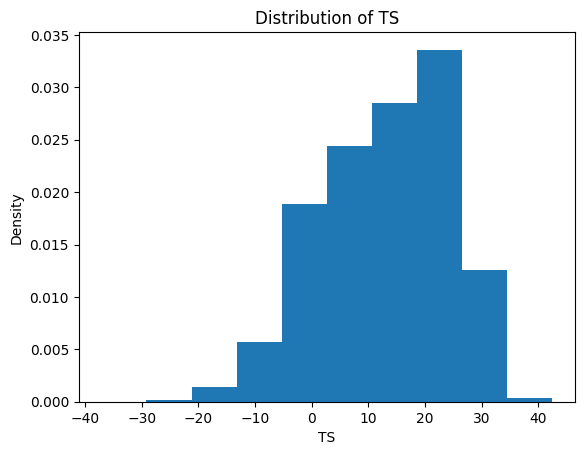

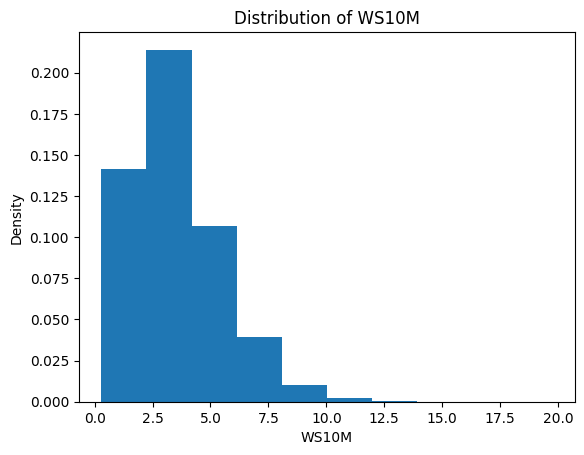

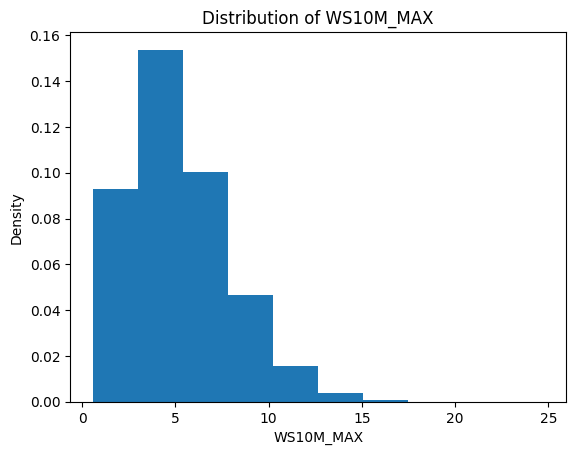

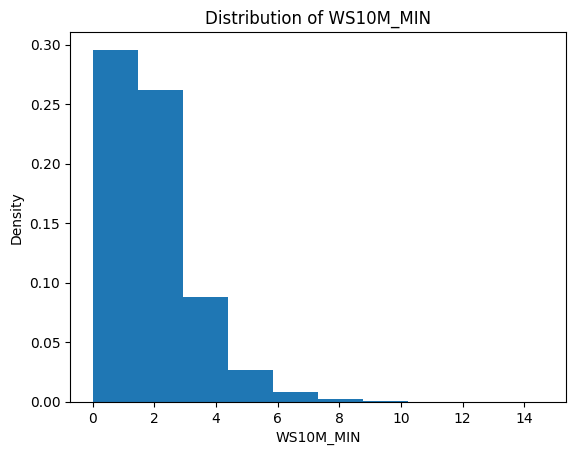

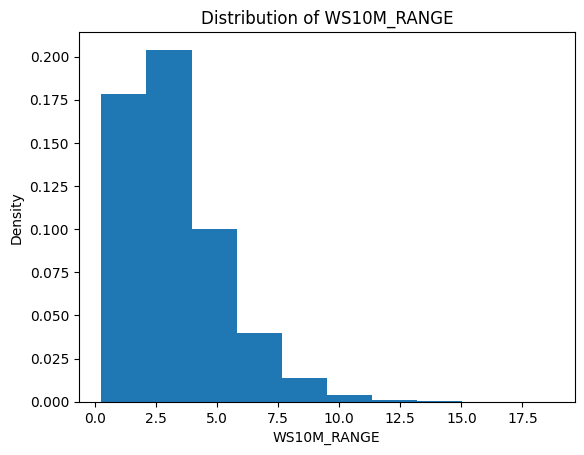

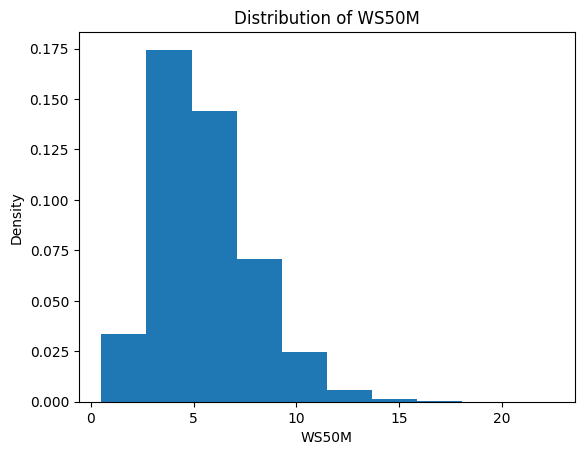

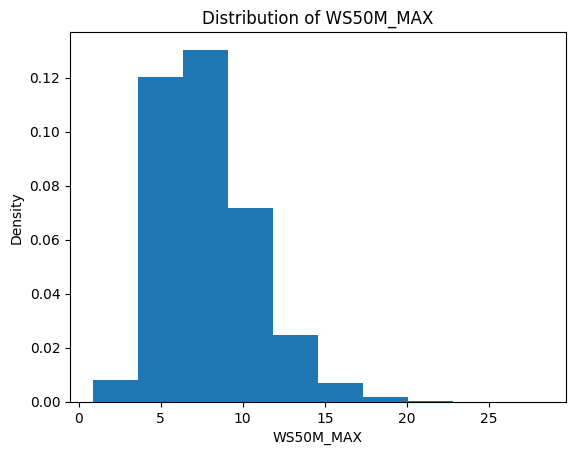

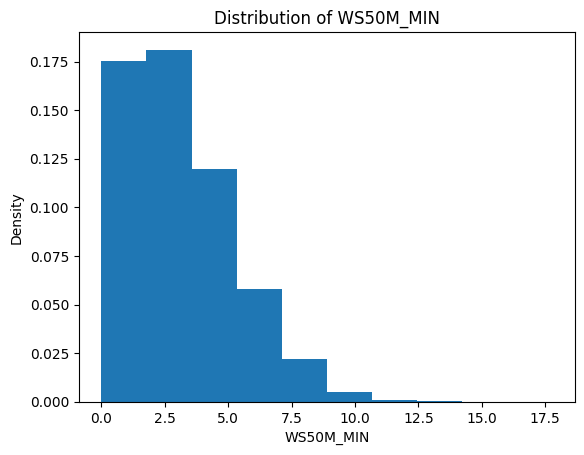

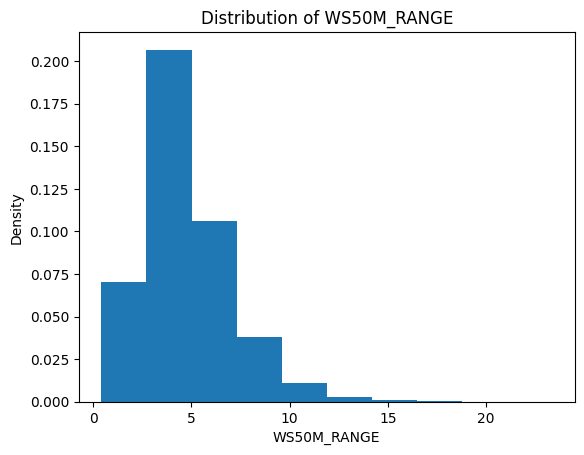

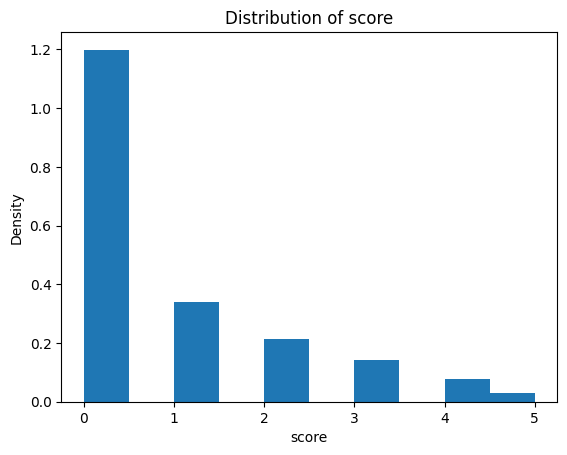

In [6]:
measuresCols = ['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE', 'score']

for col_name in measuresCols:
    plt.figure()
    plt.hist(train_timeseries[col_name], density = True)
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

# Finding Outliers

In [7]:
print('Total rows = ',len(train_timeseries.index))
for i in train_timeseries.select_dtypes(exclude = ['object']).columns:
    print ('Number of values beyong standard outlier limit in ', i)
    print(len(train_timeseries[(train_timeseries[i] > train_timeseries[i].mean() + 3*train_timeseries[i].std()) | (train_timeseries[i] < train_timeseries[i].mean() - 3*train_timeseries[i].std())]))

Total rows =  2756796
Number of values beyong standard outlier limit in  fips
0
Number of values beyong standard outlier limit in  PRECTOT
65933
Number of values beyong standard outlier limit in  PS
73197
Number of values beyong standard outlier limit in  QV2M
1
Number of values beyong standard outlier limit in  T2M
4531
Number of values beyong standard outlier limit in  T2MDEW
2023
Number of values beyong standard outlier limit in  T2MWET
1814
Number of values beyong standard outlier limit in  T2M_MAX
3384
Number of values beyong standard outlier limit in  T2M_MIN
6944
Number of values beyong standard outlier limit in  T2M_RANGE
3628
Number of values beyong standard outlier limit in  TS
4762
Number of values beyong standard outlier limit in  WS10M
29954
Number of values beyong standard outlier limit in  WS10M_MAX
23387
Number of values beyong standard outlier limit in  WS10M_MIN
39901
Number of values beyong standard outlier limit in  WS10M_RANGE
35979
Number of values beyong standard

# Removing Outliers

In [8]:
train_timeseries = train_timeseries[(train_timeseries['PRECTOT'] <= train_timeseries['PRECTOT'].mean() + 3*train_timeseries['PRECTOT'].std()) &
        (train_timeseries['PRECTOT'] >= train_timeseries['PRECTOT'].mean() - 3*train_timeseries['PRECTOT'].std())]

train_timeseries = train_timeseries[(train_timeseries['PS'] <= train_timeseries['PS'].mean() + 3*train_timeseries['PS'].std()) &
        (train_timeseries['PS'] >= train_timeseries['PS'].mean() - 3*train_timeseries['PS'].std())]

train_timeseries = train_timeseries[(train_timeseries['QV2M'] <= train_timeseries['QV2M'].mean() + 3*train_timeseries['QV2M'].std()) &
        (train_timeseries['QV2M'] >= train_timeseries['QV2M'].mean() - 3*train_timeseries['QV2M'].std())]

train_timeseries = train_timeseries[(train_timeseries['T2M'] <= train_timeseries['T2M'].mean() + 3*train_timeseries['T2M'].std()) &
        (train_timeseries['T2M'] >= train_timeseries['T2M'].mean() - 3*train_timeseries['T2M'].std())]

train_timeseries = train_timeseries[(train_timeseries['T2MDEW'] <= train_timeseries['T2MDEW'].mean() + 3*train_timeseries['T2MDEW'].std()) &
        (train_timeseries['T2MDEW'] >= train_timeseries['T2MDEW'].mean() - 3*train_timeseries['T2MDEW'].std())]

train_timeseries = train_timeseries[(train_timeseries['T2MWET'] <= train_timeseries['T2MWET'].mean() + 3*train_timeseries['T2MWET'].std()) &
        (train_timeseries['T2MWET'] >= train_timeseries['T2MWET'].mean() - 3*train_timeseries['T2MWET'].std())]

train_timeseries = train_timeseries[(train_timeseries['T2M_MAX'] <= train_timeseries['T2M_MAX'].mean() + 3*train_timeseries['T2M_MAX'].std()) &
        (train_timeseries['T2M_MAX'] >= train_timeseries['T2M_MAX'].mean() - 3*train_timeseries['T2M_MAX'].std())]

train_timeseries = train_timeseries[(train_timeseries['T2M_MIN'] <= train_timeseries['T2M_MIN'].mean() + 3*train_timeseries['T2M_MIN'].std()) &
        (train_timeseries['T2M_MIN'] >= train_timeseries['T2M_MIN'].mean() - 3*train_timeseries['T2M_MIN'].std())]

train_timeseries = train_timeseries[(train_timeseries['T2M_RANGE'] <= train_timeseries['T2M_RANGE'].mean() + 3*train_timeseries['T2M_RANGE'].std()) &
        (train_timeseries['T2M_RANGE'] >= train_timeseries['T2M_RANGE'].mean() - 3*train_timeseries['T2M_RANGE'].std())]

train_timeseries = train_timeseries[(train_timeseries['TS'] <= train_timeseries['TS'].mean() + 3*train_timeseries['TS'].std()) &
        (train_timeseries['TS'] >= train_timeseries['TS'].mean() - 3*train_timeseries['TS'].std())]

train_timeseries = train_timeseries[(train_timeseries['WS10M'] <= train_timeseries['WS10M'].mean() + 3*train_timeseries['WS10M'].std()) &
        (train_timeseries['WS10M'] >= train_timeseries['WS10M'].mean() - 3*train_timeseries['WS10M'].std())]

train_timeseries = train_timeseries[(train_timeseries['WS10M_MAX'] <= train_timeseries['WS10M_MAX'].mean() + 3*train_timeseries['WS10M_MAX'].std()) &
        (train_timeseries['WS10M_MAX'] >= train_timeseries['WS10M_MAX'].mean() - 3*train_timeseries['WS10M_MAX'].std())]

train_timeseries = train_timeseries[(train_timeseries['WS10M_MIN'] <= train_timeseries['WS10M_MIN'].mean() + 3*train_timeseries['WS10M_MIN'].std()) &
        (train_timeseries['WS10M_MIN'] >= train_timeseries['WS10M_MIN'].mean() - 3*train_timeseries['WS10M_MIN'].std())]

train_timeseries = train_timeseries[(train_timeseries['WS10M_RANGE'] <= train_timeseries['WS10M_RANGE'].mean() + 3*train_timeseries['WS10M_RANGE'].std()) &
        (train_timeseries['WS10M_RANGE'] >= train_timeseries['WS10M_RANGE'].mean() - 3*train_timeseries['WS10M_RANGE'].std())]

train_timeseries = train_timeseries[(train_timeseries['WS50M'] <= train_timeseries['WS50M'].mean() + 3*train_timeseries['WS50M'].std()) &
        (train_timeseries['WS50M'] >= train_timeseries['WS50M'].mean() - 3*train_timeseries['WS50M'].std())]

train_timeseries = train_timeseries[(train_timeseries['WS50M_MAX'] <= train_timeseries['WS50M_MAX'].mean() + 3*train_timeseries['WS50M_MAX'].std()) &
        (train_timeseries['WS50M_MAX'] >= train_timeseries['WS50M_MAX'].mean() - 3*train_timeseries['WS50M_MAX'].std())]

train_timeseries = train_timeseries[(train_timeseries['WS50M_MIN'] <= train_timeseries['WS50M_MIN'].mean() + 3*train_timeseries['WS50M_MIN'].std()) &
        (train_timeseries['WS50M_MIN'] >= train_timeseries['WS50M_MIN'].mean() - 3*train_timeseries['WS50M_MIN'].std())]

train_timeseries = train_timeseries[(train_timeseries['WS50M_RANGE'] <= train_timeseries['WS50M_RANGE'].mean() + 3*train_timeseries['WS50M_RANGE'].std()) &
        (train_timeseries['WS50M_RANGE'] >= train_timeseries['WS50M_RANGE'].mean() - 3*train_timeseries['WS50M_RANGE'].std())]

print('Total rows = ',len(train_timeseries.index))

Total rows =  2474338


# Correlation Matrix

In [9]:
corr_X = train_timeseries[['PRECTOT','PS','QV2M','T2M','T2MDEW','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE', 'score']]
correlation_plot = corr_X.corr()
correlation_plot.style.background_gradient(cmap = 'RdYlGn')

,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score
PRECTOT,1.000000,0.051470,0.284634,0.117007,0.262642,0.262567,0.043930,0.177954,-0.343956,0.113807,0.001778,0.010417,-0.009614,0.020658,0.014459,0.006348,0.033493,-0.025964,-0.060739
PS,0.051470,1.000000,0.258551,0.121002,0.301899,0.301761,0.074383,0.161513,-0.211641,0.116805,-0.106831,-0.162464,0.012949,-0.227981,-0.060541,-0.119919,0.030308,-0.184376,-0.182149
QV2M,0.284634,0.258551,1.000000,0.875095,0.962860,0.963820,0.810068,0.911854,-0.058398,0.867656,-0.217262,-0.246679,-0.101331,-0.262929,-0.201012,-0.250720,-0.076152,-0.243475,-0.040668
T2M,0.117007,0.121002,0.875095,1.000000,0.915036,0.915705,0.983863,0.982230,0.261250,0.997745,-0.193542,-0.204741,-0.113367,-0.198097,-0.185187,-0.198463,-0.106887,-0.145288,0.098238
T2MDEW,0.262642,0.301899,0.962860,0.915036,1.000000,0.999975,0.858324,0.940878,0.005209,0.906540,-0.230004,-0.259305,-0.106937,-0.276098,-0.198160,-0.245111,-0.076230,-0.236215,-0.045372
T2MWET,0.262567,0.301761,0.963820,0.915705,0.999975,1.000000,0.858991,0.941555,0.005357,0.907248,-0.229845,-0.259076,-0.106992,-0.275752,-0.198248,-0.245136,-0.076387,-0.236087,-0.044671
T2M_MAX,0.043930,0.074383,0.810068,0.983863,0.858324,0.858991,1.000000,0.939692,0.421068,0.981023,-0.199604,-0.204828,-0.125578,-0.189813,-0.183040,-0.182207,-0.124655,-0.106390,0.134755
T2M_MIN,0.177954,0.161513,0.911854,0.982230,0.940878,0.941555,0.939692,1.000000,0.085450,0.979753,-0.193177,-0.209936,-0.104081,-0.211491,-0.192209,-0.221578,-0.092348,-0.189681,0.068713
T2M_RANGE,-0.343956,-0.211641,-0.058398,0.261250,0.005209,0.005357,0.421068,0.085450,1.000000,0.259544,-0.069167,-0.039938,-0.089801,0.007924,-0.023481,0.056832,-0.118228,0.193101,0.210332
TS,0.113807,0.116805,0.867656,0.997745,0.906540,0.907248,0.981023,0.979753,0.259544,1.000000,-0.174931,-0.186172,-0.098454,-0.183316,-0.172521,-0.184477,-0.096901,-0.137547,0.106373


# Create Target and Remove date, fips, and score From X variable

In [10]:
target = train_timeseries['score']
independent_variables = train_timeseries.drop('score', axis = 1)
independent_variables = independent_variables.drop('fips', axis = 1)
independent_variables = independent_variables.drop('date', axis = 1)
independent_variables = independent_variables.drop('month', axis = 1)
independent_variables.head()
target.head()

0    1
1    2
2    2
3    2
4    1
Name: score, dtype: int64

# Train Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

Train features shape (1979470, 20)
Train target shape (1979470,)
Test features shape (494868, 20)
Test target shape (494868,)


# Scale Data

In [12]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 2.39997504, -0.78416609,  0.74119512, ..., -1.68728187,
        -1.42190019,  1.17395993],
       [ 2.44655066,  0.37551891, -0.51918943, ..., -0.40081198,
         0.61688719,  0.26443762],
       [-0.51617644, -0.98505641, -1.00721711, ..., -0.00787348,
        -1.62577893, -0.19032353],
       ...,
       [ 2.73117947, -1.01929907, -0.79927488, ...,  0.04595371,
         0.61688719,  1.28765022],
       [ 0.22385845,  0.40519588,  1.29500045, ...,  0.27741064,
         1.2285234 , -1.55460699],
       [-0.51617644,  0.75903678,  1.43292132, ..., -0.63226891,
        -1.01414272,  0.94657935]])

# Find Important Features

In [13]:
from sklearn.feature_selection import RFE

model = RandomForestClassifier(n_estimators=10) # n_estimators is the hyperparameter
rfe = RFE(model, n_features_to_select=15) # n_features_to_select is chosen on a trial and error basis
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))
selected_features = independent_variables.columns[(fit.get_support())]
print(selected_features)

Num Features: 15
Selected Features: [False  True  True  True  True False  True  True  True  True  True False
 False  True  True  True False  True  True  True]
Feature Ranking: [5 1 1 1 1 3 1 1 1 1 1 4 6 1 1 1 2 1 1 1]
Index(['PS', 'QV2M', 'T2M', 'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS',
       'WS10M', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_RANGE', 'year',
       'day'],
      dtype='object')


# Drop Unimportant Values

In [14]:
independent_variables = independent_variables.drop('PRECTOT', axis = 1)
independent_variables = independent_variables.drop('T2MWET', axis = 1)
independent_variables = independent_variables.drop('WS10M_MAX', axis = 1)
independent_variables = independent_variables.drop('WS10M_MIN', axis = 1)
independent_variables = independent_variables.drop('WS50M_MIN', axis = 1)
independent_variables.head()

X_train, X_test, y_train, y_test = train_test_split(independent_variables, target, test_size=0.2, random_state=0)

print("Train features shape", X_train.shape)
print("Train target shape", y_train.shape)
print("Test features shape", X_test.shape)
print("Test target shape", y_test.shape)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



Train features shape (1979470, 15)
Train target shape (1979470,)
Test features shape (494868, 15)
Test target shape (494868,)


# Downsampling Data

In [15]:
undersample = NearMiss()
X_train_dres_nm, y_train_dres_nm = undersample.fit_resample(X_train, y_train)

print('After UnderSampling, the shape of train_X: {}'.format(X_train_dres_nm.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres_nm.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres_nm == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres_nm == 1)))
print("Counts of label '2' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 2),sum(y_train_dres_nm == 2)))
print("Counts of label '3' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 3),sum(y_train_dres_nm == 3)))
print("Counts of label '4' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 4),sum(y_train_dres_nm == 4)))
print("Counts of label '5' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 5),sum(y_train_dres_nm == 5)))

After UnderSampling, the shape of train_X: (172842, 15)
After UnderSampling, the shape of train_y: (172842,) 

Counts of label '0' - Before UnderSampling:1195531, After UnderSampling: 28807
Counts of label '1' - Before UnderSampling:332490, After UnderSampling: 28807
Counts of label '2' - Before UnderSampling:209363, After UnderSampling: 28807
Counts of label '3' - Before UnderSampling:139009, After UnderSampling: 28807
Counts of label '4' - Before UnderSampling:74270, After UnderSampling: 28807
Counts of label '5' - Before UnderSampling:28807, After UnderSampling: 28807


# Upsampling Data

In [16]:
sm = SMOTE(random_state = 5)
X_train_ures_SMOTE, y_train_ures_SMOTE = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))
print("Counts of label '2' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 2),sum(y_train_ures_SMOTE == 2)))
print("Counts of label '3' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 3),sum(y_train_ures_SMOTE == 3)))
print("Counts of label '4' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 4),sum(y_train_ures_SMOTE == 4)))
print("Counts of label '5' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 5),sum(y_train_ures_SMOTE == 5)))

/var/folders/zp/xzl97jrj4bgfcnnjjm_hk2dc0000gn/T/ipykernel_54132/1458991678.py:2: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_ures_SMOTE, y_train_ures_SMOTE = sm.fit_resample(X_train, y_train.ravel())


After OverSampling, the shape of train_X: (7173186, 15)
After OverSampling, the shape of train_y: (7173186,) 

Counts of label '0' - Before Oversampling:1195531, After OverSampling: 1195531
Counts of label '1' - Before Oversampling:332490, After OverSampling: 1195531
Counts of label '2' - Before Oversampling:209363, After OverSampling: 1195531
Counts of label '3' - Before Oversampling:139009, After OverSampling: 1195531
Counts of label '4' - Before Oversampling:74270, After OverSampling: 1195531
Counts of label '5' - Before Oversampling:28807, After OverSampling: 1195531


# KNN Downsampled

In [17]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_classifier.fit(X_train_dres_nm, y_train_dres_nm)
y_pred_knn = knn_classifier.predict(X_test)

print('Accuracy:',accuracy_score(y_test, y_pred_knn))
print('Precision:',precision_score(y_test, y_pred_knn, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn))

Accuracy: 0.24948471107446835
Precision: 0.5447049424476852
Recall: 0.24948471107446835
F1 Score: 0.29526079289304746
Cohen Kappa Score: 0.09140799383984988


# Confusion Matirx KNN Downsampled

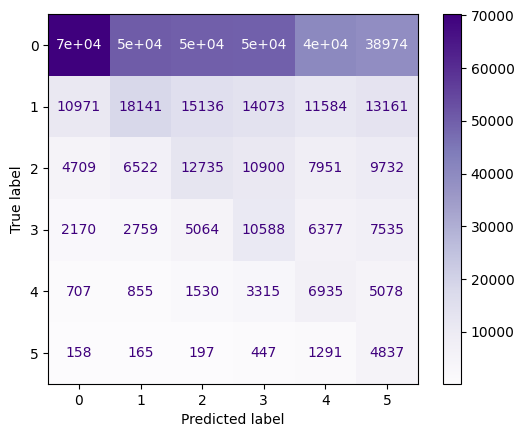

In [18]:
cm = confusion_matrix(y_test, y_pred_knn, labels = knn_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn_classifier.classes_)

colors = plt.cm.Purples
disp.plot(cmap = colors)
plt.show()

# KNN Upsampled

In [26]:
knn_classifier_SMOTE = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_classifier_SMOTE.fit(X_train_ures_SMOTE, y_train_ures_SMOTE)
y_pred_knn_SMOTE = knn_classifier_SMOTE.predict(X_test)

print('Accuracy:',accuracy_score(y_test, y_pred_knn_SMOTE))
print('Precision:',precision_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_knn_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_SMOTE))

Accuracy: 0.7518267497595318
Precision: 0.7879345908004509
Recall: 0.7518267497595318
F1 Score: 0.7642559970107387
Cohen Kappa Score: 0.6065055697349082


# Confusion Matrix KNN Upsampled

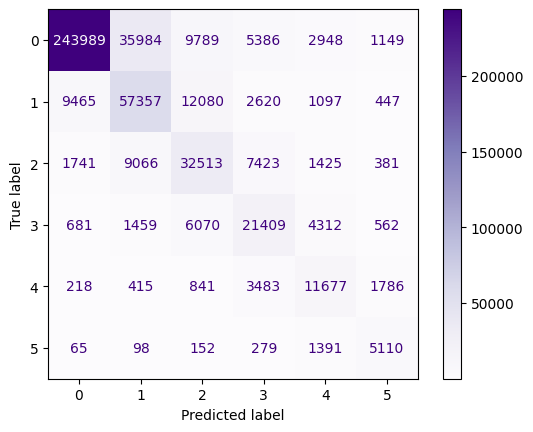

In [27]:
cm = confusion_matrix(y_test, y_pred_knn_SMOTE, labels = knn_classifier_SMOTE.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = knn_classifier_SMOTE.classes_)

colors = plt.cm.Purples
disp.plot(cmap = colors)
plt.show()

# Decision Tree Downsampled

In [21]:
DT_classifier_NM = DecisionTreeClassifier(criterion='gini')
DT_classifier_NM.fit(X_train_dres_nm,y_train_dres_nm)
y_pred_NM = DT_classifier_NM.predict(X_test)

print('Accuracy:',accuracy_score(y_test, y_pred_NM))
print('Precision:',precision_score(y_test, y_pred_NM, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM))

Accuracy: 0.22572281901436342
Precision: 0.5436981925460196
Recall: 0.22572281901436342
F1 Score: 0.26315149308048763
Cohen Kappa Score: 0.07972816519597348


# DTC Downsampled Confusion Matrix

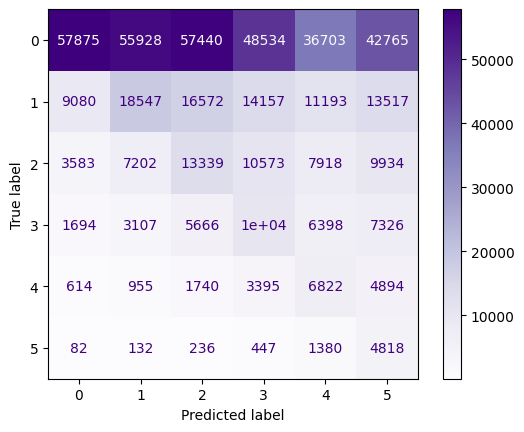

In [25]:
cm = confusion_matrix(y_test, y_pred_NM, labels = DT_classifier_NM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = DT_classifier_NM.classes_)

colors = plt.cm.Purples
disp.plot(cmap = colors)
plt.show()

# Decision Tree Upsampled

In [22]:
DT_classifier_SMOTE = DecisionTreeClassifier(criterion='gini', max_depth = 70)
DT_classifier_SMOTE.fit(X_train_ures_SMOTE,y_train_ures_SMOTE)
y_pred_NM_SMOTE = DT_classifier_SMOTE.predict(X_test)

print('Accuracy:',accuracy_score(y_test, y_pred_NM_SMOTE))
print('Precision:',precision_score(y_test, y_pred_NM_SMOTE, average='weighted'))
print('Recall:',recall_score(y_test, y_pred_NM_SMOTE, average='weighted'))
print('F1 Score:',f1_score(y_test, y_pred_NM_SMOTE, average='weighted'))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_NM_SMOTE))

Accuracy: 0.7643957580607353
Precision: 0.7728293195381504
Recall: 0.7643957580607353
F1 Score: 0.7681860155127902
Cohen Kappa Score: 0.6075513413487583


# Confusion Matrix DTC Upsampled

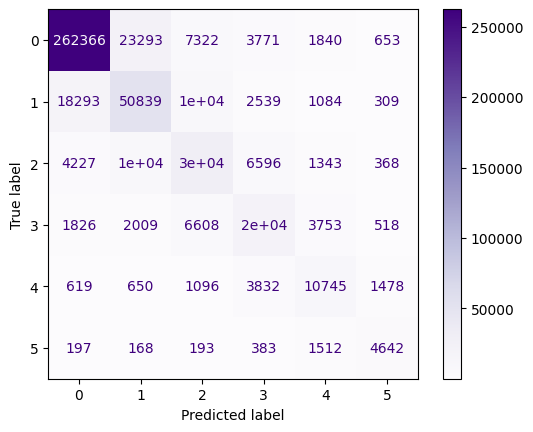

In [23]:
cm = confusion_matrix(y_test, y_pred_NM_SMOTE, labels = DT_classifier_SMOTE.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = DT_classifier_SMOTE.classes_)

colors = plt.cm.Purples
disp.plot(cmap = colors)
plt.show()